In [131]:
# Setup + tratamento e modelagem dos dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../dbs/historico-alg1_SIGA_ANONIMIZADO.csv', sep=',')

print('Este estudo analisa o aproveitamento de estudantes na disciplina ALGORITMOS 1 entre os anos de 2011 e 2022.\nSerão desconsiderados registros de equivalência por se tratar de outro processo.')
df = df[df['tipo'] != 'EQUIVALENCIA']
df['status'] = df['status'].str.replace('Reprovado','R-freq')

df['rep_nota'] = df['status'] == 'R-nota'
df['rep_nota_int'] = 0
df.loc[df['rep_nota'], 'rep_nota_int'] = 1

df['rep_freq'] = df['status'] == 'R-freq'
df['rep_freq_int'] = 0
df.loc[df['rep_freq'], 'rep_freq_int'] = 1

df['rep_todos'] = ((df['status'] == 'R-freq') | (df['status'] == 'R-nota'))
df['rep_todos_int'] = 0
df.loc[df['rep_todos'], 'rep_todos_int'] = 1

df['status_cancelado'] = df['status'] == 'Cancelado'
df['status_cancelado_int'] = 0
df.loc[df['status_cancelado'], 'status_cancelado_int'] = 1

df['sit_evasao'] = df['situacaoDiscente'] == 'Evasão'
df['sit_evasao_int'] = 0
df.loc[df['sit_evasao'], 'sit_evasao_int'] = 1

sem_referencia = 'pré-pandemia'
sem_pandemia = 'pandemia'
sem_221 = 'híbrido 22.1'
sem_222 = 'híbrido 22.2'

df['periodo_grupo'] = sem_referencia
df.loc[df['ano'] >= 2020 , 'periodo_grupo'] = sem_pandemia
df.loc[(df['ano'] == 2022) & (df['periodo'] == '1') , 'periodo_grupo'] = sem_221
df.loc[(df['ano'] == 2022) & (df['periodo'] == '2') , 'periodo_grupo'] = sem_222

aprovados = df[df['status']=='Aprovado']
rep_nota = df[df['status']=='R-nota']
rep_freq = df[df['status']=='R-freq']

def fprc(numero):
    return "{:.2%}".format(numero)

def gen_bar_graph(data:pd.Series,avg:float,title:str,leg_pos:str='lower right',percentile:bool=False)->plt.show:
    gr12 = data.plot(kind='bar')
    gr12.bar_label(gr12.containers[0],size=9)
    plt.title(title)
    plt.axhline(
        y=avg,
        color='r',
        linestyle='--',
        alpha=0.5,
        label='média geral'
        )
    plt.legend(loc=leg_pos)
    plt.xticks(rotation=45)
    if percentile:
        plt.ylabel('* dados em pontos percentuais')
    plt.show()

def comparing_periods(gp_ref: str, gp_comp: str, df: pd.DataFrame, aprovados: pd.DataFrame, com_pos:list, top_margin:list) -> None:
    rendimento_aprovados = aprovados.groupby('periodo_grupo')['nota'].mean().round(2)
    rendimento_aprovados = rendimento_aprovados[[gp_ref, gp_comp]]
    comp_rendimento = (rendimento_aprovados[gp_ref] / rendimento_aprovados[gp_comp]).round(2)

    taxa_cancelamento = (df.groupby('periodo_grupo')['status_cancelado_int'].mean() * 100).round(2)
    taxa_cancelamento = taxa_cancelamento[[gp_ref, gp_comp]]
    comp_taxa_cancelamento = (taxa_cancelamento[gp_ref] / taxa_cancelamento[gp_comp]).round(2)

    taxa_reprovacao = (df.groupby('periodo_grupo')['rep_todos_int'].mean() * 100).round(2)
    taxa_reprovacao = taxa_reprovacao[[gp_ref, gp_comp]]
    comp_taxa_reprovacao = (taxa_reprovacao[gp_ref] / taxa_reprovacao[gp_comp]).round(2)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    gen_2bar_graph(rendimento_aprovados, 'Média de nota dos aprovados', f'Proporção\n{gp_ref} / {gp_comp}\n= {comp_rendimento}', ax=axs[0],com_pos=com_pos[0],top_margin=top_margin[0])
    gen_2bar_graph(taxa_cancelamento, 'Taxa de cancelamento dos períodos', f'Proporção\n{gp_ref} / {gp_comp}\n= {comp_taxa_cancelamento}', ax=axs[1],com_pos=com_pos[1],top_margin=top_margin[1],percentile=True)
    gen_2bar_graph(taxa_reprovacao, 'Taxa de reprovação dos períodos', f'Proporção\n{gp_ref} / {gp_comp}\n= {comp_taxa_reprovacao}', ax=axs[2],com_pos=com_pos[2],top_margin=top_margin[2],percentile=True)

    plt.tight_layout()
    plt.show()

def gen_2bar_graph(data: pd.Series, title: str, comment: str, ax=None, com_pos: float=1.5, top_margin: float=5.0, percentile: bool=False) -> None:
    if ax is None:
        ax = plt.gca()
    
    x = range(len(data))
    bars = ax.bar(x, data, tick_label=data.index)
    for i, value in enumerate(data):
        ax.text(bars[i].get_x() + bars[i].get_width()/2, value + 0.1, str(value), ha='center', va='bottom')
    ax.set_ylim(0, max(data) + top_margin)
    ax.set_title(title)
    ax.text(0.5, com_pos, comment, ha='center', bbox=dict(facecolor='white', alpha=0.9, boxstyle='round'))
    if percentile:
        ax.set_ylabel('* dados em pontos percentuais')

Este estudo analisa o aproveitamento de estudantes na disciplina ALGORITMOS 1 entre os anos de 2011 e 2022.
Serão desconsiderados registros de equivalência por se tratar de outro processo.


Média geral de nota dos aprovados no período total: 77.58


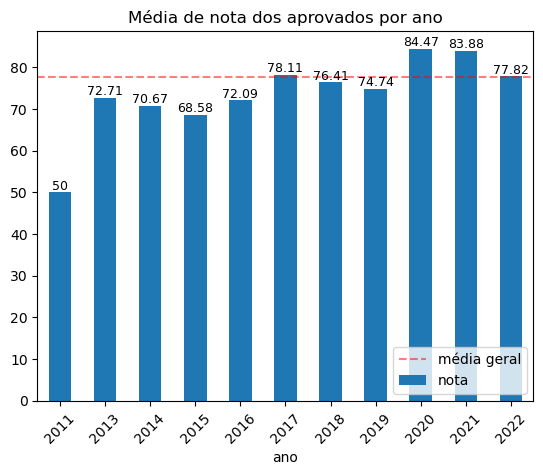

In [132]:
# 1. Qual é a média de nota dos aprovados (no período total e por ano)?
r11 = round(aprovados['nota'].mean(),2)
print('Média geral de nota dos aprovados no período total:',end=' ')
print(r11)

r12 = aprovados.groupby('ano')['nota'].mean().round(2)
gen_bar_graph(r12,r11,'Média de nota dos aprovados por ano')

Média de nota dos reprovados por nota no período total: 22.04


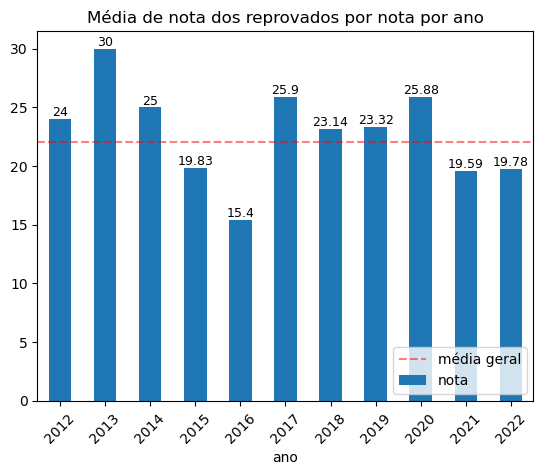

In [133]:
# 2. Qual é a média de nota dos reprovados por nota?
r21 = round(rep_nota['nota'].mean(),2)
print('Média de nota dos reprovados por nota no período total:',end=' ')
print(r21)
r22 = rep_nota.groupby('ano')['nota'].mean().round(2)
gen_bar_graph(r22,r21,'Média de nota dos reprovados por nota por ano')

Frequência dos reprovados por nota no período total: 21.15


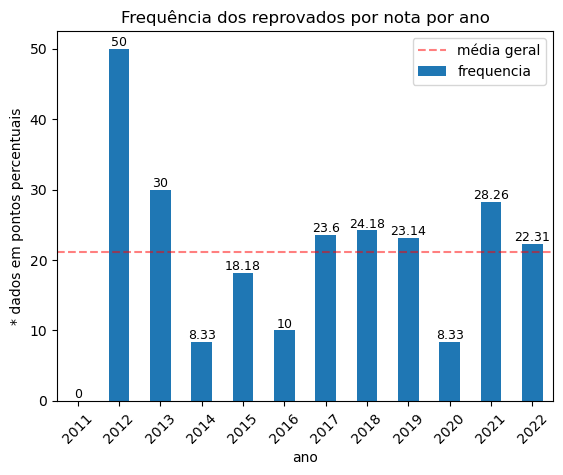

In [134]:
# 3. Qual é a frequência dos reprovados por nota?
r31 = round((df['rep_nota_int']*100).mean(),2)
print('Frequência dos reprovados por nota no período total:',end=' ')
print(r31)
r32 = (df.groupby('ano')['rep_nota_int'].mean()*100).round(2)
r32 = r32.rename("frequencia")
gen_bar_graph(r32,r31,'Frequência dos reprovados por nota por ano','upper right',percentile=True)

Porcentagem de evasões no período total: 15.27


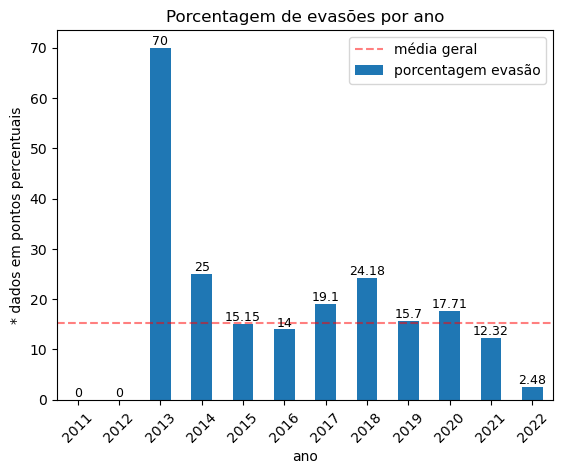

In [135]:
# 4. Qual a porcentagem de evasões (total e anual)?
r41 = round((df['sit_evasao_int'].mean()*100),2)
print('Porcentagem de evasões no período total:',end=' ')
print(r41)
r42 = (df.groupby('ano')['sit_evasao_int'].mean()*100).round(2)
r42 = r42.rename("porcentagem evasão")
gen_bar_graph(r42,r41,'Porcentagem de evasões por ano','upper right',percentile=True)

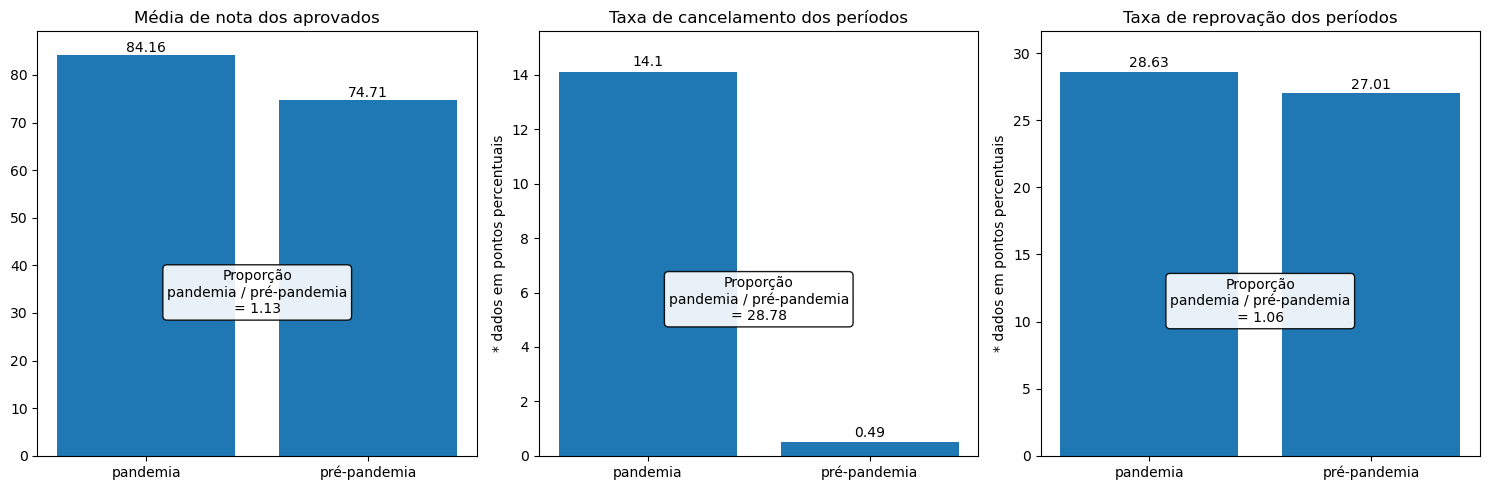

In [136]:
# 5. Como os anos de pandemia impactaram no rendimento dos estudantes?
comparing_periods(sem_pandemia, sem_referencia, df, aprovados, com_pos=[30,5,10], top_margin=[5,1.5,3])

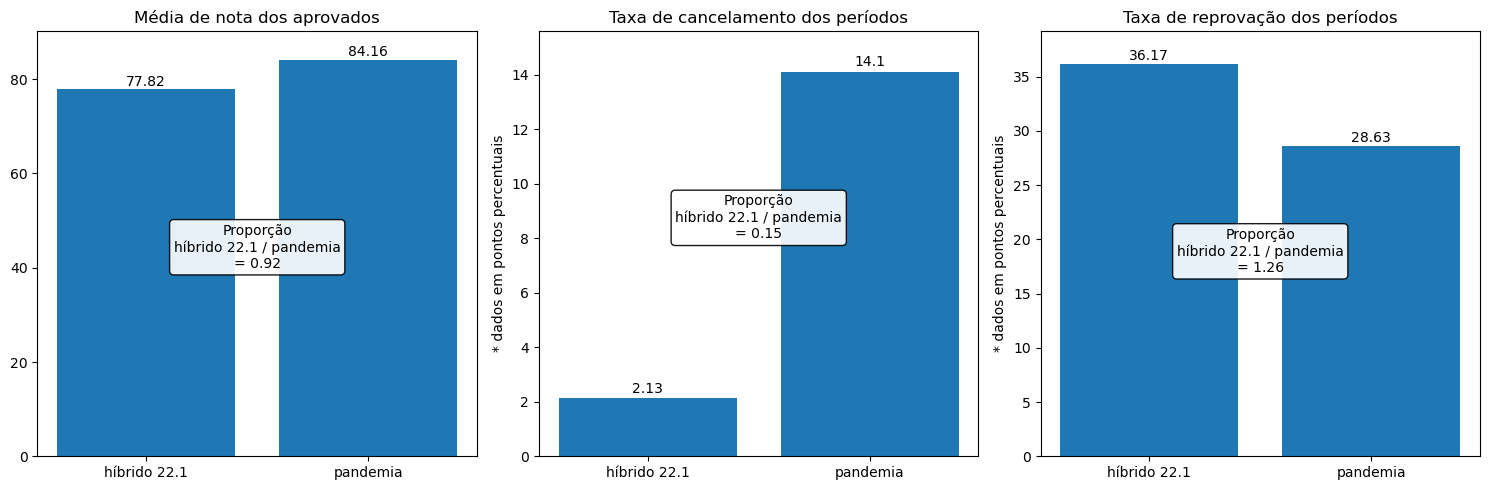

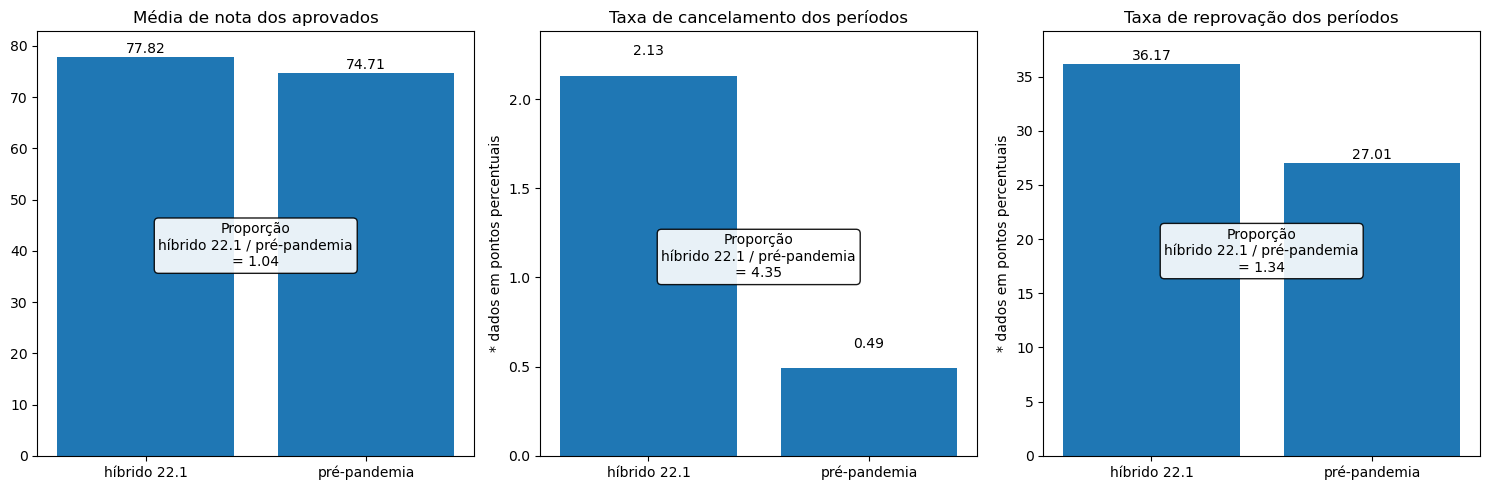

In [137]:
# 6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.
comparing_periods(sem_221, sem_pandemia, df, aprovados, com_pos=[40,8,17], top_margin=[6,1.5,3])
comparing_periods(sem_221, sem_referencia, df, aprovados, com_pos=[37,1,17], top_margin=[5,0.25,3])

In [138]:
# 7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.
print('A base de dados foi gerada no início do semestre 2022.2,\ne estando este em progresso, não é possível compará-lo aos anteriores.')
print('\nUm dado possível de se analisar é o número de matriculados,\nque também reflete os dados de um semestre iniciando:\n')
n_alunos = df[df['ano'] == 2022].drop_duplicates(subset=['matricula','ano','periodo'])

n_aluno = n_alunos.groupby('periodo_grupo')['matricula'].count()
print(n_aluno)

A base de dados foi gerada no início do semestre 2022.2,
e estando este em progresso, não é possível compará-lo aos anteriores.

Um dado possível de se analisar é o número de matriculados,
que também reflete os dados de um semestre iniciando:

periodo_grupo
híbrido 22.1    94
híbrido 22.2    27
Name: matricula, dtype: int64
